In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
TRAIN =pd.read_csv("train.csv")

In [3]:
TRAIN.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
type(TRAIN)

pandas.core.frame.DataFrame

In [5]:
TRAIN.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
TRAIN.shape

(550068, 12)

In [7]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
TRAIN.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


<AxesSubplot:>

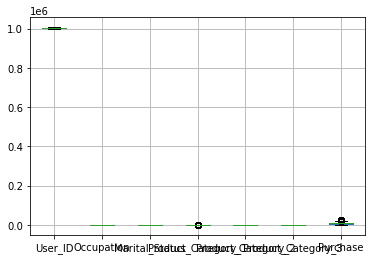

In [9]:
TRAIN.boxplot()

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

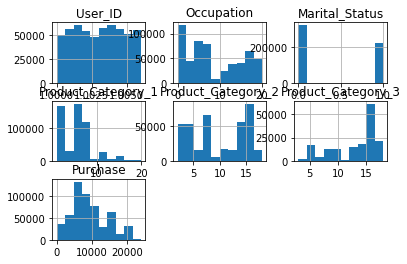

In [10]:
TRAIN.hist()

Data cleaning

In [3]:
TRAIN.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


In [4]:
TRAIN.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

checking outliers

In [5]:
TRAIN.loc[TRAIN.Product_ID=="P00265242",
             ["User_ID","Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]
]


,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
399,1000066,P00265242,5,8.0,NaN
1191,1000196,P00265242,5,8.0,NaN
1372,1000222,P00265242,5,8.0,NaN
1845,1000301,P00265242,5,8.0,NaN
2209,1000345,P00265242,5,8.0,NaN
...,...,...,...,...,...
543413,1005667,P00265242,5,8.0,NaN
544366,1005797,P00265242,5,8.0,NaN
544629,1005837,P00265242,5,8.0,NaN
544834,1005872,P00265242,5,8.0,NaN


In [6]:
TRAIN2=TRAIN.fillna(value= 0)

In [7]:
TRAIN2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
TRAIN2 = TRAIN2.drop(['User_ID', 'Product_ID'],axis=1)

In [ ]:
#converting categorical fields into numeric labels except Age, Stay_In_Current_City_Years, City_Category, and Gender.

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
le.fit(["Age", "Stay_In_Current_City_Years", "City_Category"])

LabelEncoder()

In [11]:
TRAIN2["Age"] = le.fit_transform(TRAIN["Age"])

In [12]:
TRAIN2["Stay_In_Current_City_Years"] = le.fit_transform(TRAIN2["Stay_In_Current_City_Years"])

In [13]:
TRAIN2["City_Category"] = le.fit_transform(TRAIN2["City_Category"])

In [14]:
TRAIN2 = pd.get_dummies(TRAIN2, prefix=["Gender"])

In [15]:
TRAIN2.corr()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
Age,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839,0.004262,-0.004262
Occupation,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833,-0.117291,0.117291
City_Category,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914,0.004515,-0.004515
Stay_In_Current_City_Years,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422,-0.014660,0.014660
Marital_Status,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463,0.011603,-0.011603
Product_Category_1,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703,0.045594,-0.045594
Product_Category_2,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288,0.000954,-0.000954
Product_Category_3,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501,-0.036146,0.036146
Purchase,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000,-0.060346,0.060346
Gender_F,0.004262,-0.117291,0.004515,-0.014660,0.011603,0.045594,0.000954,-0.036146,-0.060346,1.000000,-1.000000


In [16]:
X = TRAIN2.drop(columns='Purchase')
y = TRAIN2['Purchase'].values


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=88)

In [18]:
import statsmodels.api as sm

In [19]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model1=sm.OLS(y_train, X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7696.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:10:40   Log-Likelihood:            -3.7957e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385037   BIC:                         7.591e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=99)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model2=sm.OLS(y_test, X_test).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3250.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:11:12   Log-Likelihood:            -1.6267e+06
No. Observations:              165021   AIC:                         3.253e+06
Df Residuals:                  165011   BIC:                         3.254e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()

 DecisionTreeRegressor

In [24]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
dtr.fit(X_train, y_train)
print("Train accuracy:", dtr.score(X_train, y_train))

print("Test accuracy:", dtr.score(X_test, y_test))

Train accuracy: 0.6190773088341206
Test accuracy: 0.6189316290822684


 RandomForestRegressor

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[10,50,100,150,200], 
              'max_depth':[4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10,50]
     
             }

# tr = DecisionTreeClassifier(random_state=89)

# gsearch = GridSearchCV(tr, param_grid=parameters, cv=10, verbose=-1, n_jobs=-1)

gsearch.fit(X_train, y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
gsearch.best_params_

In [ ]:
gsearch.best_score_

In [ ]:
dt3=DecisionTreeClassifier(max_depth=11, criterion="gini", 
                           min_samples_split=200,
                          min_samples_leaf= 10)
dt3.fit(X_train, y_train)
print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

In [30]:
rfr = RandomForestRegressor(max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=150)
rfr.fit(X_train, y_train)
print("Train accuracy:", rfr.score(X_train, y_train))

print("Test accuracy:", rfr.score(X_test, y_test))

Train accuracy: 0.7009611394217201
Test accuracy: 0.6645089382948605


In [31]:
rfr = RandomForestRegressor(max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=160)
rfr.fit(X_train, y_train)
print("Train accuracy:", rfr.score(X_train, y_train))

print("Test accuracy:", rfr.score(X_test, y_test))

Train accuracy: 0.7010810356442199
Test accuracy: 0.6646380646577079
